###  Cross-Validation for Parameter Tuning, Model Selection, and Feature Selection

https://www.ritchieng.com/machine-learning-cross-validation/

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#   среднее 0, ст.отклонение 1
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold



In [3]:
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_09_knn")

#  Читаем данные
df = pd.read_csv('Wine.txt', sep='\t')


#  Разделяем предикторы и отклик
X = df.iloc[:, :-1].values  
y = df.iloc[:, 13].values  

In [4]:
#  Все хорошо?
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


###  Первый вариант.  Обучающее и тестовое множество.

Одно расщепление.

In [5]:
#  Расщепляем на обучающее и тестовое множество
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)  



In [6]:
#  сосчитаем accuracy модели KNN при K=5
knn_res = KNeighborsClassifier(n_neighbors=5)
knn_res.fit(X_train, y_train)
y_pred = knn_res.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


0.6949152542372882

In [7]:
#  Другой способ подсчитать accuracy
#  Нет никакой магии

np.mean(y_pred == y_test)

0.6949152542372882

###  Второй вариант.  Обучающее и тестовое множество.

###  40 расщеплений.

In [8]:

#  Проведем расщепление на train и test 40 раз,
#  Посмотрим на распределение accuracy
#  Говорят, обычно большой разброс значений


accuracy_i = [-9999.0]*40     #  избегаем использования append

for i in range(1, 41):
    #  разделим выборку на train и test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123456 + i)
    
    #  стандартизация 
    scaler = StandardScaler()   #   среднее 0, дисперсия 1
    scaler.fit(X_train)
    X_train_2 = scaler.transform(X_train)  
    X_test_2 = scaler.transform(X_test)  

    #  применяем KNN при K=5
    knn_res = KNeighborsClassifier(n_neighbors=5)
    knn_res.fit(X_train_2, y_train)
    pred_i = knn_res.predict(X_test_2)
    #  сохраняем accuracy
    accuracy_i[i-1]= np.mean(pred_i == y_test)
    

In [9]:
print(accuracy_i)

[0.9777777777777777, 0.9555555555555556, 0.9111111111111111, 1.0, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 1.0, 0.9777777777777777, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9777777777777777, 0.9777777777777777, 1.0, 0.9555555555555556, 0.9777777777777777, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9333333333333333, 0.9555555555555556, 0.9777777777777777, 0.9111111111111111, 1.0, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9111111111111111, 0.9555555555555556, 0.9111111111111111, 0.9111111111111111, 0.9555555555555556, 0.9777777777777777, 0.9111111111111111, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333]


(array([ 6.,  0.,  6.,  0., 13.,  0., 10.,  5.]),
 array([0.91111111, 0.92222222, 0.93333333, 0.94444444, 0.95555556,
        0.96666667, 0.97777778, 0.98888889, 1.        ]),
 <a list of 8 Patch objects>)

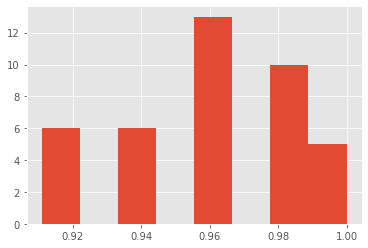

In [10]:
#  Распределение значений accuracy
plt.hist(accuracy_i, bins=8)

####   Третий вариант. K-fold cross-validation

Обучающее множество расщепляется на несколько частей ("фолдов") <br>
Недостаток примера - не отделено тестовое множество

In [12]:

#  Знакомство с командой KFold
#  Учебное расщепление за счет  shuffle=False
#  На практике почти всегда   shuffle=True

kf = KFold(n_splits=5, shuffle=False, random_state = 1234)

#  kf.split(X)




In [16]:
#  Посмотрим на результат расщепления. Оно учебное, так как  shuffle=False,
# Посмотрим, как выборка разделяется на части для кросс-валидации  
#  
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107


In [17]:
#  Обычно расщепляем так:  shuffle=True

#  Число блоков  (folds)
n_folds = 5

kf = KFold(n_splits = n_folds, shuffle=True, random_state = 1234)


#  Варианты значений числа соседей
search_space = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

#  готовим вектор для хранения результатов подсчета accuracy,  избегаем использования append


accuracy_i = np.full((n_folds, len(search_space)), -9999.0)

fold_num = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #  стандартизация 
    scaler = StandardScaler()   #   среднее 0, дисперсия 1
    scaler.fit(X_train)
    X_train_2 = scaler.transform(X_train)  
    X_test_2  = scaler.transform(X_test)  

    j_count = 0
    
    #  применяем KNN при разных K из search_space
    for j in search_space:
        knn_res = KNeighborsClassifier(n_neighbors=j)
        knn_res.fit(X_train_2, y_train)
        pred_i = knn_res.predict(X_test_2)
        #  сохраняем accuracy
        accuracy_i[fold_num, j_count ]= np.mean(pred_i == y_test)

        j_count = j_count +1
    
    fold_num = fold_num +1
    
    
print(accuracy_i)    
    
    
    

[[0.94444444 0.83333333 0.94444444 0.91666667 0.94444444 0.94444444
  0.97222222 0.97222222 0.97222222 0.97222222 0.97222222 0.97222222
  0.97222222 0.97222222 0.97222222]
 [0.94444444 0.97222222 0.97222222 0.97222222 1.         1.
  1.         0.97222222 0.97222222 0.97222222 0.97222222 0.97222222
  0.97222222 0.94444444 0.91666667]
 [0.94444444 0.91666667 0.94444444 0.91666667 0.97222222 0.88888889
  0.94444444 0.94444444 0.94444444 0.94444444 0.94444444 0.94444444
  0.94444444 0.94444444 0.94444444]
 [0.97142857 0.94285714 0.97142857 0.97142857 0.97142857 0.97142857
  0.97142857 0.94285714 0.97142857 0.94285714 0.97142857 0.97142857
  0.97142857 0.94285714 0.97142857]
 [0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
  0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
  0.97142857 0.97142857 1.        ]]


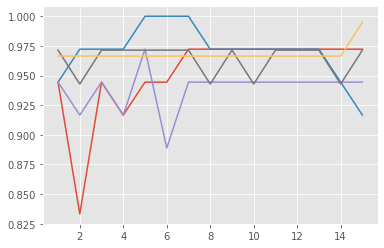

In [20]:
plt.plot(list(range(1, 16)), accuracy_i[0, :])
plt.plot(list(range(1, 16)), accuracy_i[1, :])
plt.plot(list(range(1, 16)), accuracy_i[2, :])
plt.plot(list(range(1, 16)), accuracy_i[3, :])
plt.plot(list(range(1, 16)), accuracy_i[4, :]-0.005)





In [27]:
#  Комментарий про команду np.full

accuracy_i = np.full((n_folds, len(search_space)), -9999.0)
print(accuracy_i)  

[[-9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999
  -9999 -9999 -9999]
 [-9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999
  -9999 -9999 -9999]
 [-9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999
  -9999 -9999 -9999]
 [-9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999
  -9999 -9999 -9999]
 [-9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999
  -9999 -9999 -9999]]


####   Четвертый вариант. K-fold cross-validation  для определения гиперпараметров 

Обучающее множество расщепляется на несколько частей ("фолдов") <br>

Принципиальный недостаток: не нашлось места для стандартизации!

Недостаток реализации примера - не отделено тестовое множество

In [21]:
#  Кросс-валидация для определения гиперпараметров 
#  Подготовительный этап 
#  знакомимся с командой cross_val_score

from sklearn.model_selection import cross_val_score


In [22]:

#  10-блочная кросс-валидация модели KNN с параметром n_neighbors=5
# 

knn = KNeighborsClassifier(n_neighbors=5)

#  Используем процедуру cross_val_score
#  Используем X и y, не разделяем на обучающее и тестовое множество, 
#  Критерий качества  scoring='accuracy', возможны другие метрики

#  стандартизация ?

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


[0.68421053 0.66666667 0.66666667 0.55555556 0.66666667 0.55555556
 0.77777778 0.66666667 0.82352941 0.75      ]


In [23]:
#  определение оптимального значения числа ближайших соседей K 
#  в модели KNN

#  k меняем от 1 до 30
k_range = range(1, 31)

#  готовим список со значениями accuracy
#  избегая использования  append

k_scores = []

# перебираем число соседей на решетке
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())


print(k_scores)


[0.7478134674922601, 0.7487250601995183, 0.7219341245270037, 0.6986906604747161, 0.6813295493636051, 0.6921482628138974, 0.6806351049191606, 0.7317315961472308, 0.7091825765393877, 0.7369603543171654, 0.7033346233230134, 0.708890178878569, 0.7033346233230134, 0.7081957344341245, 0.7255568455452356, 0.7144457344341245, 0.72000128998968, 0.7255568455452356, 0.7091825765393877, 0.7202936876504988, 0.7091825765393877, 0.7314047987616099, 0.7258492432060544, 0.7147381320949433, 0.7147381320949433, 0.7144457344341245, 0.7091825765393878, 0.7091825765393878, 0.7147381320949433, 0.7147381320949433]


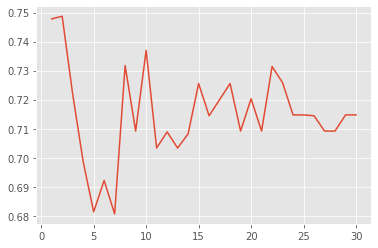

In [24]:
plt.plot(list(range(1, 31)), k_scores)


In [ ]:
####   Пятый вариант. K-fold cross-validation  для определения гиперпараметров 

Обучающее множество расщепляется на несколько частей ("фолдов") <br>

Pipeline решает проблему со стандартизацией!

Недостаток реализации примера - не отделено тестовое множество

In [25]:
#  подключаем библиотеки

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV



In [26]:
#   Так делать нельзя, но сейчас это заготовка для будущего использования
#   Стандартизация. 

standardizer = StandardScaler()

X_std = standardizer.fit_transform(X)

#   Почему так делать нельзя, где ошибка?


In [27]:
# Еще одна заготовка -  модель KNN с 5 соседями
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(X_std, y)


In [28]:
# Создадим  pipeline
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])



In [29]:
# Какие значения числа ближайших соседей нас интересуют?
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Организуем перебор значений числа ближайших соседей
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_std, y)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
#  Желаем посмотреть на лучшее значение k
clf.best_estimator_.get_params()['knn__n_neighbors']

9